In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('liver_cirrhosis.csv')

# Menampilkan informasi dasar tentang dataset
print(data.info())
print(data.describe())
print(data.head())

# Memeriksa nilai yang hilang
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Mengidentifikasi kolom numerik
numeric_cols = data.select_dtypes(include='number').columns

# Mengatasi nilai yang hilang hanya pada kolom numerik dengan nilai median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Memeriksa kembali untuk nilai yang hilang setelah pengisian
missing_values_after_fillna = data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after_fillna)from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [2]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())


   N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2221  18499        0.5        149.0     4.04   227.0     598.0   52.70   
1    1230  19724        0.5        219.0     3.93    22.0     663.0   45.00   
2    4184  11839        0.5        320.0     3.54    51.0    1243.0  122.45   
3    2090  16467        0.7        255.0     3.74    23.0    1024.0   77.50   
4    2105  21699        1.9        486.0     3.54    74.0    1052.0  108.50   

   Tryglicerides  Platelets  ...  Stage  Status_CL  Status_D  Drug_Placebo  \
0           57.0      256.0  ...      1      False     False          True   
1           75.0      220.0  ...      2      False     False          True   
2           80.0      225.0  ...      2      False     False          True   
3           58.0      151.0  ...      2      False      True          True   
4          109.0      151.0  ...      1      False      True          True   

   Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S 

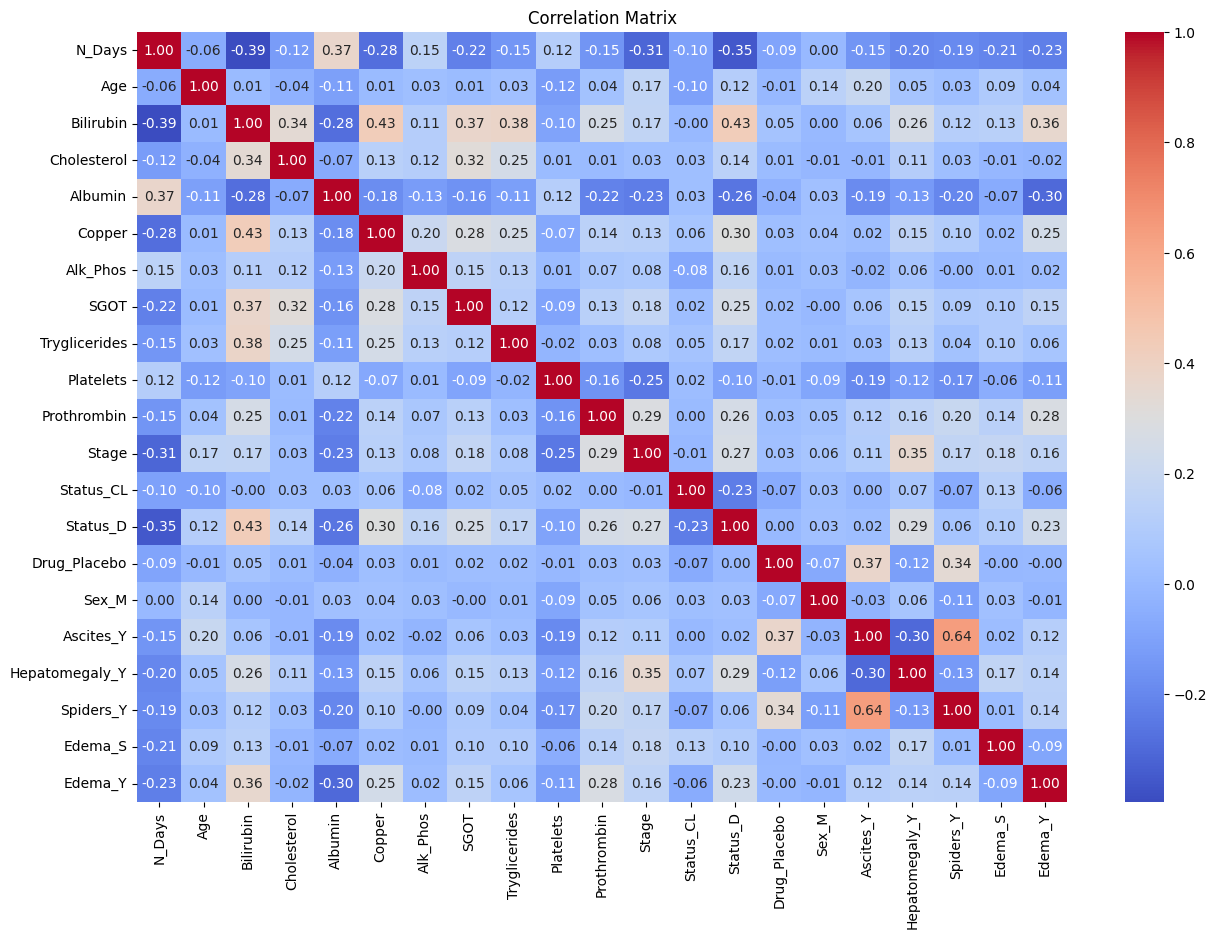

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Feature selection based on correlation
threshold = 0.1  # Example threshold
high_corr_features = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > threshold)]
data_selected = data_encoded[high_corr_features]
print("Selected Features:\n", data_selected.head())


Selected Features:
    N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2221  18499        0.5        149.0     4.04   227.0     598.0   52.70   
1    1230  19724        0.5        219.0     3.93    22.0     663.0   45.00   
2    4184  11839        0.5        320.0     3.54    51.0    1243.0  122.45   
3    2090  16467        0.7        255.0     3.74    23.0    1024.0   77.50   
4    2105  21699        1.9        486.0     3.54    74.0    1052.0  108.50   

   Tryglicerides  Platelets  ...  Stage  Status_CL  Status_D  Drug_Placebo  \
0           57.0      256.0  ...      1      False     False          True   
1           75.0      220.0  ...      2      False     False          True   
2           80.0      225.0  ...      2      False     False          True   
3           58.0      151.0  ...      2      False      True          True   
4          109.0      151.0  ...      1      False      True          True   

   Sex_M  Ascites_Y  Hepatomegaly_Y 

In [5]:
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA(n_components=10)  # Example for reducing to 10 dimensions
data_reduced = pca.fit_transform(data_selected)
print("Data Reduced Shape:", data_reduced.shape)


Data Reduced Shape: (25000, 10)


In [6]:
from sklearn.model_selection import train_test_split

# Split features and target
X = data_reduced
y = data_encoded['Stage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train and Test Data Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Train and Test Data Shapes: (20000, 10) (5000, 10) (20000,) (5000,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9414
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94      1657
           2       0.92      0.93      0.92      1697
           3       0.96      0.96      0.96      1646

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [8]:
# Contoh pelatihan model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Menghitung feature importance
n_features = 10
importances = pd.DataFrame({'feature': data_selected.columns[:n_features], 'importance': feature_importances})
importances = importances.sort_values('importance', ascending=False)
print(importances)


         feature  importance
9      Platelets    0.283107
2      Bilirubin    0.125851
4        Albumin    0.092557
0         N_Days    0.083280
8  Tryglicerides    0.081273
1            Age    0.072070
7           SGOT    0.069848
3    Cholesterol    0.067080
5         Copper    0.063254
6       Alk_Phos    0.061681


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0

/home/aqnaazmy/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aqnaazmy/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aqnaazmy/.local/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/aqnaazmy/.local/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/aqn

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
